## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data manipulation
2.	Exploratory Data Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Use the word document provided to add your answers, output, plots, anything that helps with your explanation (the in class practice solutions could give ideas). Try to make it look professional (do not just spit out code).  

Submission: Create a zip folder named with your WSU id (e.g. w999w999_HW1). In the zip file you should save a ipynb and pdf file of your work. 

Good luck!


# Part1: Cleaning, wrangling data

**Data cleaning focuses on removing inaccurate data from your data set whereas data wrangling focuses on transforming the data's format, typically by converting “raw” data into another format more suitable for use.
This excersize uses the traffic_cameras file. Your task is to follow prompts to change, modify your data. Try your best!**

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the CSV file
df = pd.read_csv("traffic_cameras.csv")
 
# Printing top 5 rows
df.head()

,Camera ID,Location Name,Camera Status,Turn on Date,Camera Manufacturer,ATD Location ID,Landmark,Signal Engineer Area,Council District,Jurisdiction,...,CROSS_ST_AKA,COA Intersection ID,Modified Date,IP Comm Status,IP Comm Status Date and Time,Published Screenshots,Screenshot Address,Funding,ID,Location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,5/24/2018,Advidia,LOC16-003180,NaN,SOUTHEAST,2,AUSTIN FULL PURPOSE,...,NaN,5157009.0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,NaN,https://cctv.austinmobility.io/image/370.jpg,1/4 Cent,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,5/21/2018,Advidia,LOC16-000640,NaN,SOUTHWEST,5,AUSTIN FULL PURPOSE,...,NaN,5154418.0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/379.jpg,1/4 Cent,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,6/7/2018,Advidia,LOC16-000800,NaN,NORTHEAST,"3, 1",AUSTIN FULL PURPOSE,...,NaN,5163165.0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/404.jpg,1/4 Cent,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,9/9/2016,Advidia,LOC16-003740,NaN,NORTHWEST,7,AUSTIN FULL PURPOSE,...,NaN,5156985.0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/447.jpg,1/4 Cent,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,2/24/2020,Advidia,LOC16-003710,NaN,CENTRAL,10,AUSTIN FULL PURPOSE,...,NaN,5153874.0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/552.jpg,None Identified,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### 1. How many rows and columns does your data have?

In [3]:
### Your code goes here ###
df.shape
print('There are {} rows and {} columns'.format(df.shape[0],df.shape[1]))

There are 802 rows and 28 columns


### 2. What can you tell us about the type of variables we have?

In [4]:
### Your code goes here ###

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary St Segment ID         0 non-null      float64
 12  Cross St Segment ID           0 non-null      float64
 13  Prima

In [5]:
df.isnull().sum()

Camera ID                         0
Location Name                     0
Camera Status                     0
Turn on Date                    360
Camera Manufacturer             156
ATD Location ID                   0
Landmark                        708
Signal Engineer Area              3
Council District                 12
Jurisdiction                      3
Location Type                     0
Primary St Segment ID           802
Cross St Segment ID             802
Primary Street Block              2
Primary Street                    1
PRIMARY_ST_AKA                  802
Cross Street Block               45
Cross Street                     37
CROSS_ST_AKA                    802
COA Intersection ID              62
Modified Date                     0
IP Comm Status                    0
IP Comm Status Date and Time      0
Published Screenshots           802
Screenshot Address                0
Funding                          52
ID                                0
Location                    

### Your asnwer should go in here ### change the cell to markdown

There are 27 variable out which 17 have null values so, this is not a tidy data. Tha data should be cleaned.
<b>A tidy data is each variable forms a coulumn, each observation forms a row, each cell is a single measurement</b>





### 3. Delete only the columns that have all null values, name it df1 (nothing else, but null)

In [6]:
### Your code goes here ###
df1 = df

In [7]:
df1 = df1.dropna(axis=1, how='all')

In [8]:
df1.head()

,Camera ID,Location Name,Camera Status,Turn on Date,Camera Manufacturer,ATD Location ID,Landmark,Signal Engineer Area,Council District,Jurisdiction,...,Cross Street Block,Cross Street,COA Intersection ID,Modified Date,IP Comm Status,IP Comm Status Date and Time,Screenshot Address,Funding,ID,Location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,5/24/2018,Advidia,LOC16-003180,NaN,SOUTHEAST,2,AUSTIN FULL PURPOSE,...,6112.0,NUCKOLS CROSSING RD,5157009.0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,1/4 Cent,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,5/21/2018,Advidia,LOC16-000640,NaN,SOUTHWEST,5,AUSTIN FULL PURPOSE,...,501.0,KINNEY AVE,5154418.0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,1/4 Cent,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,6/7/2018,Advidia,LOC16-000800,NaN,NORTHEAST,"3, 1",AUSTIN FULL PURPOSE,...,3600.0,OAK SPRINGS DR,5163165.0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,1/4 Cent,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,9/9/2016,Advidia,LOC16-003740,NaN,NORTHWEST,7,AUSTIN FULL PURPOSE,...,10201.0,STONELAKE BLVD,5156985.0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,1/4 Cent,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,2/24/2020,Advidia,LOC16-003710,NaN,CENTRAL,10,AUSTIN FULL PURPOSE,...,2601.0,WESTOVER RD,5153874.0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,None Identified,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary Street Block          800 non-null    float64
 12  Primary Street                801 non-null    object 
 13  Cross

### 4. Dropp columns that have (any) null values name it df2

In [10]:
### Your code goes here ###
df2 = df1

In [11]:
df2 = df2.dropna(axis=1, how='any')

In [12]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Camera ID                     802 non-null    int64 
 1   Location Name                 802 non-null    object
 2   Camera Status                 802 non-null    object
 3   ATD Location ID               802 non-null    object
 4   Location Type                 802 non-null    object
 5   Modified Date                 802 non-null    object
 6   IP Comm Status                802 non-null    object
 7   IP Comm Status Date and Time  802 non-null    object
 8   Screenshot Address            802 non-null    object
 9   ID                            802 non-null    object
 10  Location                      802 non-null    object
dtypes: int64(1), object(10)
memory usage: 69.0+ KB


(802, 11)

In [13]:
df2.head

<bound method NDFrame.head of      Camera ID                                      Location Name  \
0          370           PLEASANT VALLEY RD / NUCKOLS CROSSING RD   
1          379                     BARTON SPRINGS RD / KINNEY AVE   
2          404                     SPRINGDALE RD / OAK SPRINGS DR   
3          447                         BRAKER LN / STONELAKE BLVD   
4          552                      EXPOSITION BLVD / WESTOVER RD   
..         ...                                                ...   
797       1190                             GUADALUPE ST / 46TH ST   
798       1274                    CESAR CHAVEZ ST / SAN MARCOS ST   
799       1275                     BURNET RD / RESEARCH BLVD SVRD   
800       1276   BASTROP HWY / MONTOPOLIS TO BASTROP NB RAMP (...   
801       1277                       BURNET RD / BRIGHT VERDE WAY   

    Camera Status ATD Location ID Location Type                 Modified Date  \
0       TURNED_ON    LOC16-003180       ROADWAY  10/28/2021 

### 5. Rename column names in df2 so they are more usable (name the new dataframe df3) to the followings: cam_id, loc_name, cam_stat, atd_loc_id, loc_type, date, comm_stat, comm_stat_date, screen_addr, id, location

In [14]:
### Your code goes here ###
df3 = df2

In [15]:
df3 = df3.rename(columns={'Camera ID':'cam_id','Location Name':'loc_name','Camera Status':'cam_stat',
                         'ATD Location ID':'atd_loc_id','Location Type':'loc_type',	'Modified Date':'date',
                          'IP Comm Status':'comm_stat',	'IP Comm Status Date and Time':'comm_stat_date',
                          'Screenshot Address':'screen_addr','ID':'id',	'Location':'location'})

In [16]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### 6. Split "date" column into two  new columns within df3 ('Dates' and 'Time') /modify df3 data/

In [17]:
### Your code goes here ###
df3['Date'] = pd.to_datetime(df3['date']).dt.date
df3['Time'] = pd.to_datetime(df3['date']).dt.time

In [18]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Date,Time
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),2021-10-28,08:40:00
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),2021-10-29,08:45:00
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),2021-10-29,19:38:00
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),2021-10-29,19:49:00
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),2021-10-29,19:47:00


### 7. Split atd_loc into two new columns 'Loc' and 'code' within df3

In [19]:
### Your code goes here ###
df3['atd_loc_id']

0      LOC16-003180
1      LOC16-000640
2      LOC16-000800
3      LOC16-003740
4      LOC16-003710
           ...     
797    LOC16-006535
798    LOC16-005790
799    LOC16-003045
800    LOC21-017685
801    LOC20-017295
Name: atd_loc_id, Length: 802, dtype: object

In [20]:
df3[['Loc','Code']] = df3.atd_loc_id.str.split('-',expand=True)

In [21]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Date,Time,Loc,Code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),2021-10-28,08:40:00,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),2021-10-29,08:45:00,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),2021-10-29,19:38:00,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),2021-10-29,19:49:00,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),2021-10-29,19:47:00,LOC16,003710


### 8. What are the unique values in loc_type?

In [22]:
### Your code goes here ###
df3.loc_type.unique()

array(['ROADWAY', 'BUILDING'], dtype=object)

### 9. Replace 'ROADWAY' to '0',  'BUILDING' to '1' in the loc_type column within df3

In [23]:
### Your code goes here ###
df3['loc_type'] = df3.loc_type.replace({'ROADWAY':0,'BUILDING':1})

In [24]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Date,Time,Loc,Code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),2021-10-28,08:40:00,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),2021-10-29,08:45:00,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),2021-10-29,19:38:00,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),2021-10-29,19:49:00,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),2021-10-29,19:47:00,LOC16,003710


In [25]:
df3.loc_type.unique()

array([0, 1])

### 10. Split on on '/' the loc_name column into two new variables 'corner1', 'corner2' 

In [26]:
### Your code goes here ###
df3

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Date,Time,Loc,Code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),2021-10-28,08:40:00,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),2021-10-29,08:45:00,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),2021-10-29,19:38:00,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),2021-10-29,19:49:00,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),2021-10-29,19:47:00,LOC16,003710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1190,GUADALUPE ST / 46TH ST,TURNED_ON,LOC16-006535,0,09/19/2021 06:17:00 PM +0000,ONLINE,06/08/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/1190.jpg,5f8da8c34e4035067602f80c,POINT (-97.73252 30.313028),2021-09-19,18:17:00,LOC16,006535
798,1274,CESAR CHAVEZ ST / SAN MARCOS ST,TURNED_ON,LOC16-005790,0,09/19/2021 06:17:00 PM +0000,OFFLINE,05/12/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/1274.jpg,5fa580608c53d7001593adf2,POINT (-97.7346111 30.2605892),2021-09-19,18:17:00,LOC16,005790
799,1275,BURNET RD / RESEARCH BLVD SVRD,TURNED_ON,LOC16-003045,0,09/19/2021 06:17:00 PM +0000,ONLINE,03/13/2021 09:35:00 AM +0000,https://cctv.austinmobility.io/image/1275.jpg,604b73eed89027001b43b7ca,POINT (-97.7264786 30.3728848),2021-09-19,18:17:00,LOC16,003045
800,1276,BASTROP HWY / MONTOPOLIS TO BASTROP NB RAMP (...,TURNED_ON,LOC21-017685,0,10/31/2021 08:40:00 AM +0000,ONLINE,10/31/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/1276.jpg,60709789cd04d0001b7605d1,POINT (-97.6902124 30.2427789),2021-10-31,08:40:00,LOC21,017685


In [27]:
df3['corner1'] = df3.loc_name.str.split('/',expand=True)[0]
df3['corner2'] = df3.loc_name.str.split('/',expand=True)[1]

In [28]:
df3.head

<bound method NDFrame.head of      cam_id                                           loc_name   cam_stat  \
0       370           PLEASANT VALLEY RD / NUCKOLS CROSSING RD  TURNED_ON   
1       379                     BARTON SPRINGS RD / KINNEY AVE  TURNED_ON   
2       404                     SPRINGDALE RD / OAK SPRINGS DR  TURNED_ON   
3       447                         BRAKER LN / STONELAKE BLVD  TURNED_ON   
4       552                      EXPOSITION BLVD / WESTOVER RD  TURNED_ON   
..      ...                                                ...        ...   
797    1190                             GUADALUPE ST / 46TH ST  TURNED_ON   
798    1274                    CESAR CHAVEZ ST / SAN MARCOS ST  TURNED_ON   
799    1275                     BURNET RD / RESEARCH BLVD SVRD  TURNED_ON   
800    1276   BASTROP HWY / MONTOPOLIS TO BASTROP NB RAMP (...  TURNED_ON   
801    1277                       BURNET RD / BRIGHT VERDE WAY  TURNED_ON   

       atd_loc_id  loc_type                  

# Part2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

***Steps in EDA***:
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset.

**Don't forget to add "markdown" cells to include your findings or to explain what you are doing** 

In [29]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Reading the CSV file
df_fish = pd.read_csv("Fish.csv")
 
# Printing top 5 rows
df_fish.head() 

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Fish Dataset

<b>1. Species:</b> <i>species name of fish</i>

<b>2. Weight:</b> <i>weight of fish in Gram g</i>

<b>3. Length1:</b> <i>vertical length in cm </i>

<b>4. Length2:</b> <i>diagonal length in cm </i>

<b>5. Length3:</b> <i> cross length in cm </i>

<b>6. Height:</b> <i>height in cm </i>

<b>7. Width:</b> <i>diagonal width in cm</i>

<h3> 1. Provide descriptions of your sample and features </h3>

<b> Let's first see rows and columns of the dataset. </b>

In [31]:
df_fish.shape #return shape of dataset

(159, 7)

There are <b><i>159 rows</i></b> and <b><i>7 coulumns</i></b>.

In [32]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


<b> Now Let's see the descriptive statistics at glance. </b>

In [33]:
df_fish.describe().T #summary statistics

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [34]:
df_fish['Species'].value_counts().to_frame() #Species count

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


<h3> 2. Check for missing data. </h3>

<b> Let's see if there any null values. </b>

In [35]:
df_fish.isnull().sum() #checks null values 

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There are no null values

<h3> 3. Identify the shape of your data. </h3>

In [36]:
fishes = df_fish['Species'].value_counts().to_frame() #counts the no of species

<b> Bar graph on Number of speceis </b>

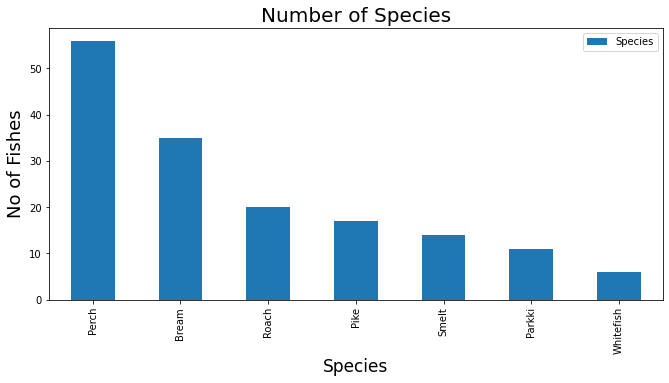

In [37]:
fishes.plot(kind='bar',figsize=(11,5))
plt.title('Number of Species',fontsize=20)
plt.ylabel('No of Fishes',fontsize=18)
plt.xlabel('Species',fontsize=17)
plt.show() #bar graph on number of speceis

In [38]:
fishes

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


<b> Let's compare all variables </b>

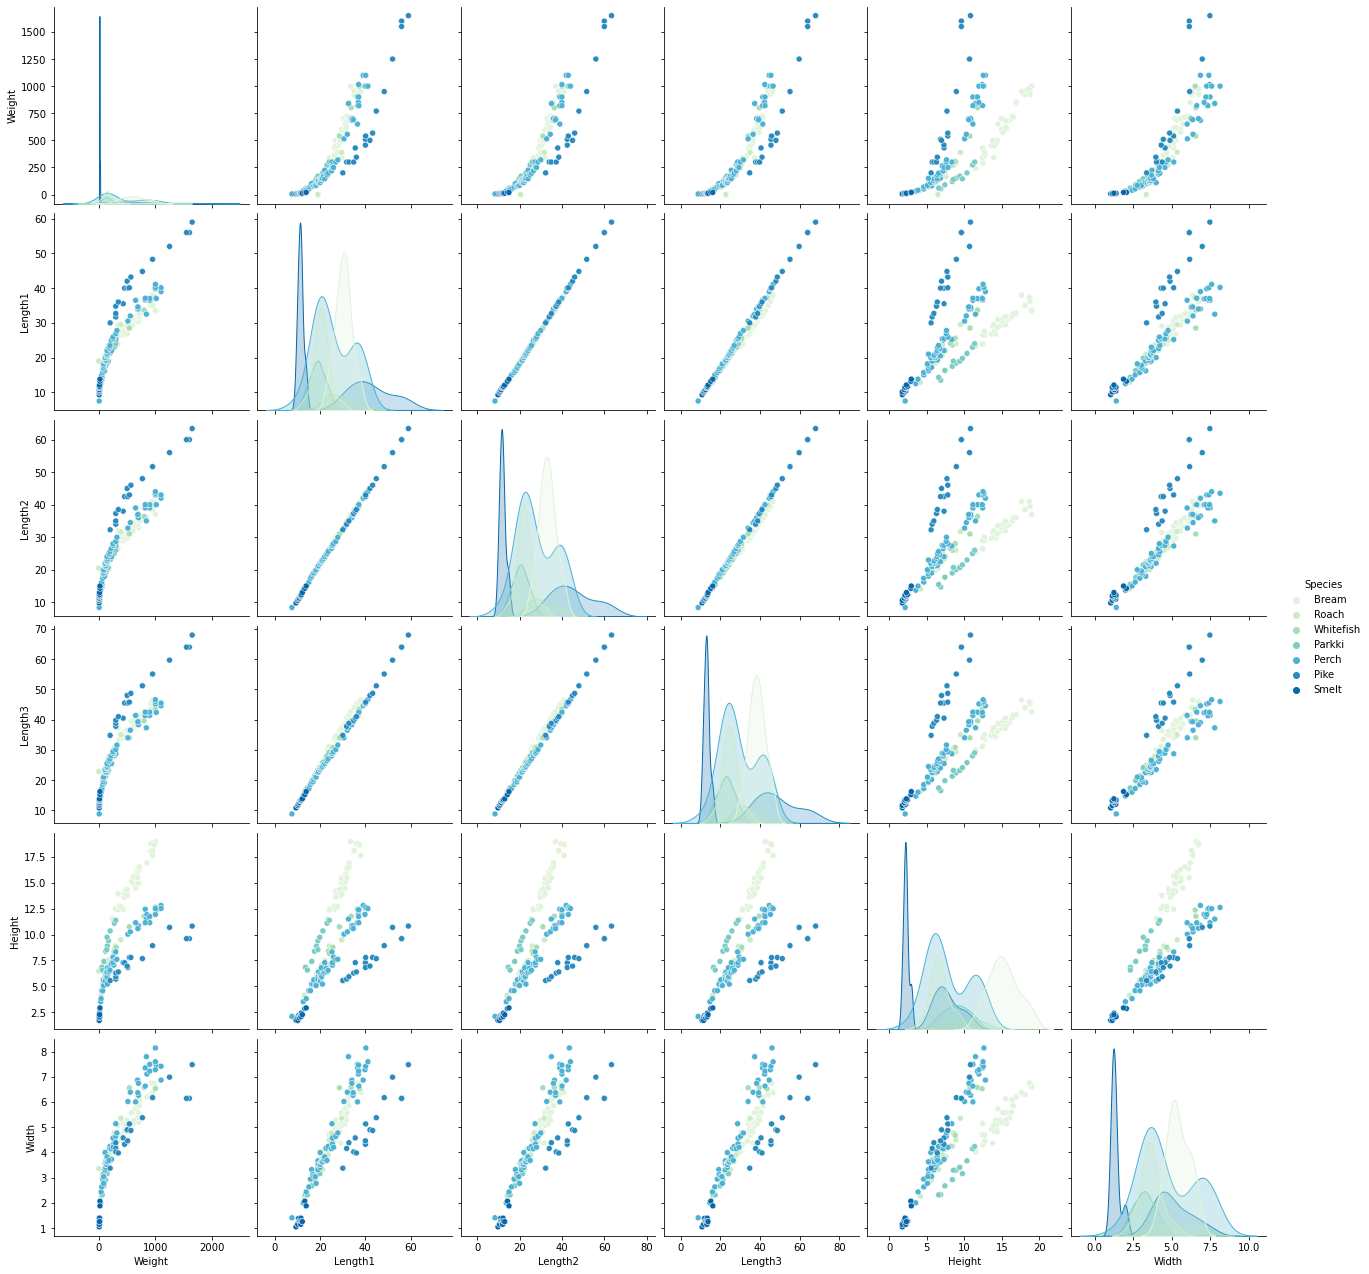

In [39]:
sns.pairplot(data = df_fish, hue='Species', height=3, palette = 'GnBu') #compare all the varibles
plt.show()

<b> By comparing all the variable we get some insight into the data set.<b>
1. Length1, Length2, Length3 have Multicollinearity
2. We can easily classify the species in Height Vs Weight scatter plot.
3. There are ouliers in Weight, (Length1,Length2,Length3) variables.

Let compare <b>Height</b> and <b>Weight</b> varible in bigger scatter plot. 

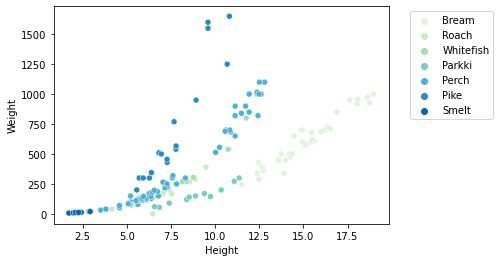

In [40]:
#Comparing Height and Weight

sns.scatterplot(x='Height', y= 'Weight', data=df_fish, hue='Species', sizes=(2,200), legend='full', palette = 'GnBu' )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show() 

<b> Multicollinearity :</b> The effect of individual varibles cannot clearly separated.

<b> Dealing with Multicollinearity.</b> (When building regression model?) 
    
1. Either deal with Multicollinearity or drop the varibles and then build a regression model.
    
    a. To deal with Multicollinearity, build new regression model with each independent variable which has Multicollinearity. Then, calculate the <b><i> Tolerance </i></b> and <b><i> Variance inflation factor </i></b>.

    <b> Note : </b><i> Tolerance must be lessthan 0.1 and VIR must be greaterthan 10 </i>

<b> Now, Let's see some varible which has mutlicollinearity raliton. </b>

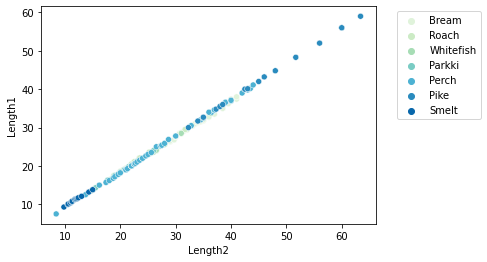

In [41]:
#Relation between Length2 and Length3

sns.scatterplot(x='Length2', y= 'Length1', data=df_fish, hue='Species', sizes=(2,200), legend='full',palette = 'GnBu' )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
plt.show()

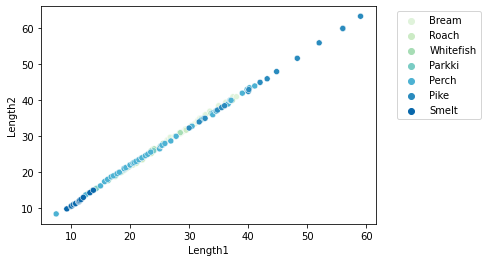

In [42]:
#Relation between Length2 and Length3

sns.scatterplot(x='Length1', y= 'Length2', data=df_fish, hue='Species', sizes=(2,200), legend='full',palette = 'GnBu' )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

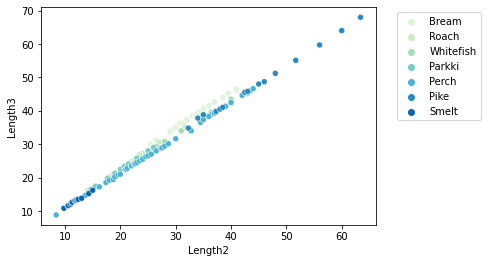

In [43]:
#Relation between Length2 and Length3
sns.scatterplot(x='Length2', y= 'Length3', data=df_fish, hue='Species', sizes=(2,200), legend='full',palette = 'GnBu' )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

<h3> 4. Identify significant correlations. </h3>

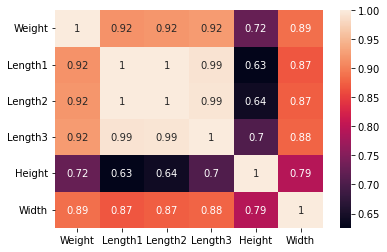

In [44]:
sns.heatmap(df_fish.corr(method ='pearson'), annot=True)
plt.show()

By seeing the Heat map, Weight varible has strong correlations with other variable.

Before finalizing weight varible has a strong correlations with other variable,let us also check the p-value with other varibles

   <b> Note : P - value.</b>
   
   1. when P - value < 0.001 is <b><i> Strong </i></b>.
   2. when P - value < 0.05 is <b><i>Moderate</i></b>
   3. when p - value < 0.1 is <b><i>Weak</i></b>
   4. when P - value > 0.1 has no certainity in result.

In [45]:
def pearson(X,Y):
    pearson_co, p_valve = stats.pearsonr(X,Y)
    return ('Perason Correlation : {}, p_value : {}'.format(pearson_co, p_valve))

In [46]:
pearson(df_fish['Length1'],df_fish['Weight'])

'Perason Correlation : 0.915711716031204, p_value : 4.749619722768398e-64'

In [47]:
pearson(df_fish['Length2'],df_fish['Weight'])

'Perason Correlation : 0.9186177013642216, p_value : 3.395113229031834e-65'

In [48]:
pearson(df_fish['Length3'],df_fish['Weight'])

'Perason Correlation : 0.9230435593620122, p_value : 5.023191454303076e-67'

In [49]:
pearson(df_fish['Height'],df_fish['Weight'])

'Perason Correlation : 0.7243453291993319, p_value : 3.84234183895167e-27'

In [50]:
pearson(df_fish['Width'],df_fish['Weight'])

'Perason Correlation : 0.8865066052433448, p_value : 2.0381946411853594e-54'

<h4> By scrutinizing all the p-value, Weight Varible has a significant correlation other varibles. </h4>

<h3> 5. Spot/deal with outliers in the dataset. </h3>

By observing all the varibles, There are ouliers in <b> Weight, (Length1,Length2,Length3) </b> variables.

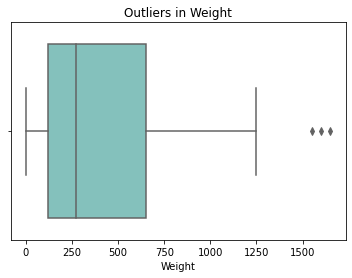

In [51]:
sns.boxplot(x='Weight', data=df_fish, orient='h', palette="GnBu")
plt.title('Outliers in Weight')
plt.show()

<b> Let's create a dataframe which only have (L1,L2,L3) columns.</b>

In [52]:
Lengths = df_fish[['Length1','Length2','Length3']]

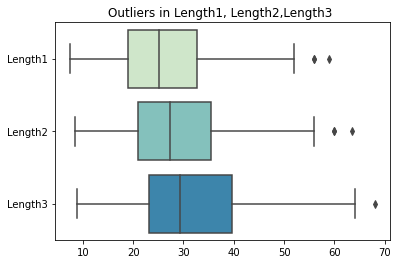

In [53]:
sns.boxplot(data=Lengths, orient='h', palette="GnBu")
plt.title('Outliers in Length1, Length2,Length3 ')
plt.show()

In [54]:
def outliers(df,X):
    Q1 = df[X].quantile(0.25) #25th percentile
    Q3 = df[X].quantile(0.75) #75th percentile
    IQR = Q3-Q1 #IQR 
    
    old_shape = df.shape 
    # print('The old shape is {}'.format(old_shape))
    
    lower_limit =  (Q1 - 1.5 * IQR) #lowernond
    upper_limit =  (Q3 + 1.5 * IQR) #upperbond
    
    find = df[(df[X]<lower_limit)|(df[X]>upper_limit)] #detects the outliers
    
    df.drop(find.index, inplace=True) #drops outliers by index
    
    new_shape = df.shape
    #print('The new shape is {}'.format(new_shape))
    
    sns.boxplot(x=X, data=df) #returns box without outliers
    plt.title('Boxplot without outliers')

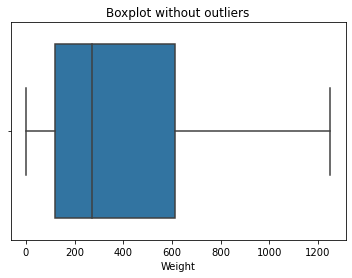

In [55]:
outliers(df_fish,'Weight')

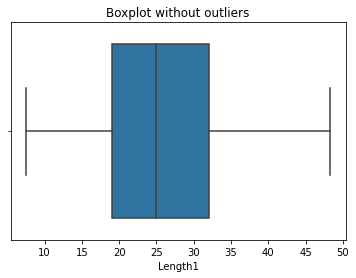

In [56]:
outliers(df_fish,'Length1')

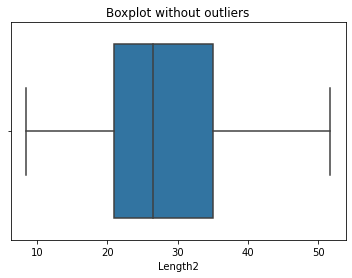

In [57]:
outliers(df_fish,'Length2')

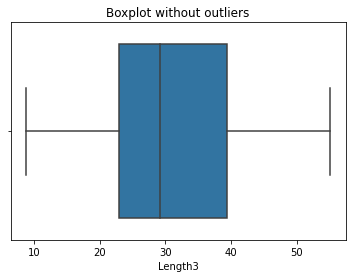

In [58]:
outliers(df_fish,'Length3')

# References
1. https://www.kaggle.com/aungpyaeap/fish-market/
2. https://cmdlinetips.com/2019/04/how-to-specify-colors-to-scatter-plots-in-python/
3. https://www.kaggle.com/omkarnibandhe/fish-weight-predictor#Removing-obvious-outliers-from-the-data
4. irisDataset (CS746)